In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.optimizers import SGD, Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.utils import to_categorical
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.utils import shuffle
from sklearn.datasets import load_digits
import os
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.models import load_model
from statistics import mean
from sympy import sympify
from time import sleep
from sympy import Symbol, sympify, factor, plot, solve, sin, Limit, Derivative, init_printing
from sympy import Integral, log
from collections import deque



In [2]:
d={1:'aa',2:'auu',3: 'bha',4: 'cha',5: 'da',6: 'ga',7: 'gha',8: 'gnya',9: 'ha',10: 'ka',11:'la',12:'ma',13:'pa',14:'pha',15: 'ra',16:'sa',17: 'ta',18: 'tta',19: 'va',20:'ya'}
X=np.zeros((30610,1024))
y=np.zeros((30610,1))



def load_image(folder):
    count=0
    k=0
    images = []
    for filename in os.listdir(folder):
        k+=1        
        
        for i in os.listdir(os.path.join(folder,filename)):
              
            img=cv2.imread(os.path.join(folder,filename,i),cv2.IMREAD_GRAYSCALE)
            
            if img is not None:
                images.append(img)
                X[count,:]=np.reshape(images[count],(1,1024))
                y[count,0]=k
              
                
                count+=1
                
            else:
                continue
        
                            
load_image("OneDrive/Desktop/Data")


     



In [3]:
#splitting into test and training data
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2)

#reshaping 
print(train_x.shape[0])

train_x = np.reshape(train_x, (train_x.shape[0], 32,32))
test_x = np.reshape(test_x, (test_x.shape[0], 32,32))





24488


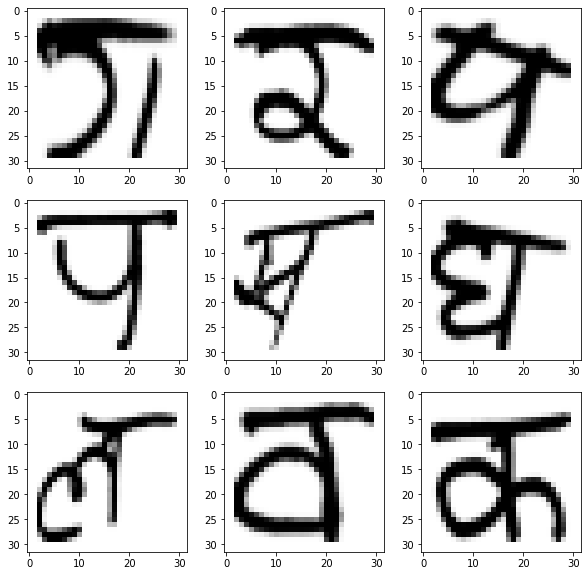

In [4]:
shuff = shuffle(train_x[:100])
fig, ax = plt.subplots(3,3, figsize = (10,10))
axes = ax.flatten()
for i in range(9):
    _, shu = cv2.threshold(shuff[i], 30, 200, cv2.THRESH_BINARY)
    axes[i].imshow(np.reshape(shuff[i], (32,32)), cmap="Greys")
plt.show()


In [5]:
print(train_x.shape[0])
train_X = train_x.reshape(train_x.shape[0],train_x.shape[1],train_x.shape[2],1)
print("New shape of train data: ", train_X.shape)
test_X = test_x.reshape(test_x.shape[0], test_x.shape[1], test_x.shape[2],1)
print("New shape of tra data: ", test_X.shape)

24488
New shape of train data:  (24488, 32, 32, 1)
New shape of tra data:  (6122, 32, 32, 1)


In [6]:
train_yOHE = to_categorical(train_y, num_classes = 21, dtype='int')
print("New shape of train labels: ", train_yOHE.shape)
test_yOHE = to_categorical(test_y, num_classes = 21, dtype='int')
print("New shape of test labels: ", test_yOHE.shape)

New shape of train labels:  (24488, 21)
New shape of test labels:  (6122, 21)


In [7]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32,32,1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Flatten())
model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))
model.add(Dense(21,activation ="softmax"))

In [8]:
model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_X, train_yOHE, epochs=1,  validation_data = (test_X,test_yOHE))

766/766 [==============================] - 13s 17ms/step - loss: 0.8146 - accuracy: 0.7695 - val_loss: 0.2098 - val_accuracy: 0.9334


In [9]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 5, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0

In [10]:
print("The validation accuracy is :", history.history['val_accuracy'])
print("The training accuracy is :", history.history['accuracy'])
print("The validation loss is :", history.history['val_loss'])
print("The training loss is :", history.history['loss'])

The validation accuracy is : [0.9333550930023193]
The training accuracy is : [0.7695197463035583]
The validation loss is : [0.20982550084590912]
The training loss is : [0.814554750919342]


In [11]:
im = cv2.imread("OneDrive/Desktop/pilot.jpg")
cv2.imshow(" image",im)
gray=cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

blur = cv2.GaussianBlur(gray,(5,5),0)

thresh =  cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV, blockSize = 321, C = 38)
count=0
t=[]
for i in [*range(thresh.shape[0])]:
    
    for j in [*range(thresh.shape[1])]:
        if thresh[i,j]==255 :
            count+=1
        else: 
            continue
    t.append(count)
    count=0

    
max_value = max(t)

max_index = t.index(max_value)

thresh[max_index-8:max_index+16,:]=0

cv2.imshow("header removed ",thresh)
cv2.waitKey(0)
cv2.destroyAllWindows()
    

#################      Now finding Contours         ###################

contours,hierarchy = cv2.findContours(thresh,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

samples =  np.empty((0,1024))
responses = []
keys = [i for i in range(48,58)]

key=0
A=np.zeros((6,1024))


j=0
for cnt in contours:
   
    if cv2.contourArea(cnt)>100:
            [x,y,w,h] = cv2.boundingRect(cnt)

            if  h>28:
                j+=1
                cv2.rectangle(im,(x,y),(x+w,y+h),(0,0,255),2)
                roi = thresh[y:y+h,x:x+w]
               
                roismall = cv2.resize(roi,(32,32))

                cv2.imshow('norm',im)
                key = cv2.waitKey(0)
          
                A[j-1,:]=np.reshape(roismall,(1,1024))
                
            elif key == 27:  # (escape to quit)
                sys.exit()
            elif key in keys:
                responses.append(int(chr(key)))
                sample = roismall.reshape((1,1024))
             
    print(j)

responses = np.array(responses,np.float32)
responses = responses.reshape((responses.size,1))


print ("Extraction Complete!")

np.savetxt('generalsamples.data',samples)
np.savetxt('generalresponses.data',responses)



0
0
0
1
2
3
4
5
5
5
Extraction Complete!


In [12]:
#Reshape 1


testing_A = np.reshape(A, (A.shape[0],32,32))

#Reshape 2
testing_A = testing_A.reshape(testing_A.shape[0],testing_A.shape[1],testing_A.shape[2],1)




0
(6, 32, 32, 1)
1
(6, 32, 32, 1)
2
(6, 32, 32, 1)
3
(6, 32, 32, 1)
4
(6, 32, 32, 1)
5
(6, 32, 32, 1)
6
Word is :: vapakayalaha


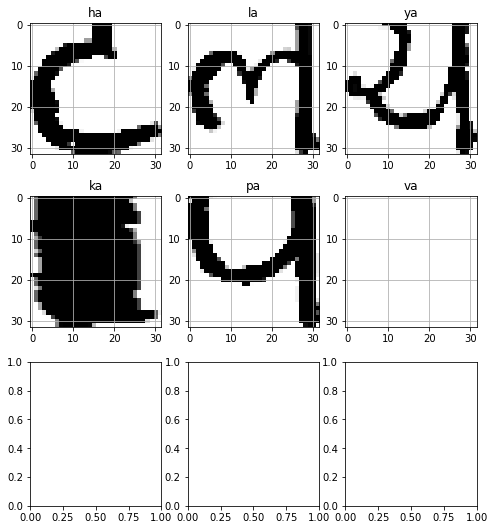

In [13]:
fig, axes = plt.subplots(3,3, figsize=(8,9))
axes = axes.flatten()
predictions=[]
a=[]
predictions = model.predict(testing_A)
for i,ax in enumerate(axes):
    print(i)
    if i<testing_A.shape[0]:
        print(testing_A.shape)
        img = np.reshape(testing_A[i], (32,32))

        ax.imshow(img, cmap="Greys")
    else:
        break

    pred = np.argmax(predictions[i])
    a.append(d[pred])
    ax.set_title(d[pred])
    ax.grid()
a.reverse()
word="".join(a)
print("Word is ::",word)
